# Projet de Machine Learning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd

In [2]:
path    = ''
data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

### Question 1

In [3]:
# Here we show the first five lines of the data
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
# Changing the type of qualitative variables into factors
data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density\\n(P/Km2)'].str.replace(',', '.'))
#data['Density.n.P.Km2.'] = pd.to_numeric(data['Density\\n(P/Km2)'])

In [5]:
list(data.columns)

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude',
 'Density.n.P.Km2.']

### Question 2

In [6]:
loading_missing_value = data.isna().sum().sort_values(ascending=False)

#print(loading_missing_value)
print('Number of missing values = ', loading_missing_value.sum())

Number of missing values =  6979


In [7]:
print("Are there no duplicates in Loading? : ",data.duplicated().sum()==0)

Are there no duplicates in Loading? :  True


In [8]:
# Check which columns have missing values
isna_list = []
for col_name in data.columns:
    isna_list.append([col_name, data[col_name].isna().sum()])
isna_array = np.array(isna_list)

sorted_i = np.argsort(isna_array[:, 1].astype(int))[::-1]
sorted_i_array = isna_array[sorted_i]

print(sorted_i_array)

[['Renewables (% equivalent primary energy)' '2137']
 ['Financial flows to developing countries (US $)' '2089']
 ['Renewable-electricity-generating-capacity-per-capita' '931']
 ['Value_co2_emissions_kt_by_country' '428']
 ['gdp_growth' '317']
 ['gdp_per_capita' '282']
 ['Energy intensity level of primary energy (MJ/$2017 PPP GDP)' '207']
 ['Renewable energy share in the total final energy consumption (%)'
  '194']
 ['Access to clean fuels for cooking' '169']
 ['Electricity from nuclear (TWh)' '126']
 ['Low-carbon electricity (% electricity)' '42']
 ['Electricity from fossil fuels (TWh)' '21']
 ['Electricity from renewables (TWh)' '21']
 ['Access to electricity (% of population)' '10']
 ['Density.n.P.Km2.' '1']
 ['Longitude' '1']
 ['Density\\n(P/Km2)' '1']
 ['Land Area(Km2)' '1']
 ['Latitude' '1']
 ['Primary energy consumption per capita (kWh/person)' '0']
 ['Year' '0']
 ['Entity' '0']]


**Many variables are have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset:**

* Renewable-electricity-generating-capacity-per-capitacapitacapitacapita

* Financial flows to developing countries (US Dollars)

* Renewables (% equivalent primary energy).



In [9]:
columns_to_remove = ["Financial flows to developing countries (US $)",
                     "Renewable-electricity-generating-capacity-per-capita",
                     "Renewables (% equivalent primary energy)"]

data = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density\\n(P/Km2)'].str.replace(',', '.'))

data = data.drop(columns=columns_to_remove)

print(data.head())

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4            

### Question 3

In [27]:
original_dimensions = data.shape

data_complete = data.dropna()

# Afficher les dimensions du DataFrame original et du nouveau
print("Original Dimensions:", original_dimensions)
print("New Dimensions:", data_complete.shape)

# Mettre à jour le DataFrame d'origine avec le DataFrame des cas complets
data = data_complete.copy()

data = data.reset_index()

Original Dimensions: (2868, 19)
New Dimensions: (2868, 19)


### Question 4

We begin by unidimentional descriptive analysis of the data. Looking at the qualitative variables: Entity and Year, what is noticable is that not every country has data from all the years between 2000 and 2020. To discover what countries are affected, we will do a barplot of all the countries that is missing at least a year.

In [ ]:
entity_counts = data['Entity'].value_counts()

# Set the threshold for the minimum number of appearances
appearance_threshold = 20

# Get entities with count not equal to the threshold
filtered_entities = entity_counts[entity_counts != appearance_threshold].index.tolist()

# Filter data for entities with count not equal to the threshold
filtered_data = data[data['Entity'].isin(filtered_entities)]

# Create a table of frequencies for the 'Entity' column in the filtered data
entity_table = filtered_data['Entity'].value_counts()

# Create a barplot for the table of frequencies with rotated x-axis labels
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(filtered_entities, entity_table, color="green")
plt.title("Barplot of countries that are missing data from one or more years")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Country")
plt.ylabel("Number of years represented")

# Add counts as text labels on each bar
for i, count in enumerate(entity_table):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

plt.show()

Here, we notice that there are 12 countries (out of 176) thar are missing data from certain years. The country missing the most data is South Sudan with only 3 observations, whereas Quatar is only missing one obesrvation.

Now, we will look at the **quantitative** variables. Starting by plotting the histograms of the first three variables.

In [29]:
#Transformation of variables
#WARNING: Only run ONCE!!
data['Access to electricity (% of population)'] = np.sqrt(data['Access to electricity (% of population)'])
data["Access to clean fuels for cooking"] = np.sqrt(data["Access to clean fuels for cooking"])
data['Electricity from fossil fuels (TWh)'] = np.sqrt(data['Electricity from fossil fuels (TWh)'])
data["Electricity from nuclear (TWh)"] = np.sqrt(data["Electricity from nuclear (TWh)"])
data["Electricity from renewables (TWh)"] = np.sqrt(data["Electricity from renewables (TWh)"])
data["Value_co2_emissions_kt_by_country"] = np.log(data["Value_co2_emissions_kt_by_country"])
#data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"] = np.log(data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"])
data["Primary energy consumption per capita (kWh/person)"] = np.log(data["Primary energy consumption per capita (kWh/person)"])
data["gdp_per_capita"] = np.log(data["gdp_per_capita"])
data["Land Area(Km2)"] = np.log(data["Land Area(Km2)"])

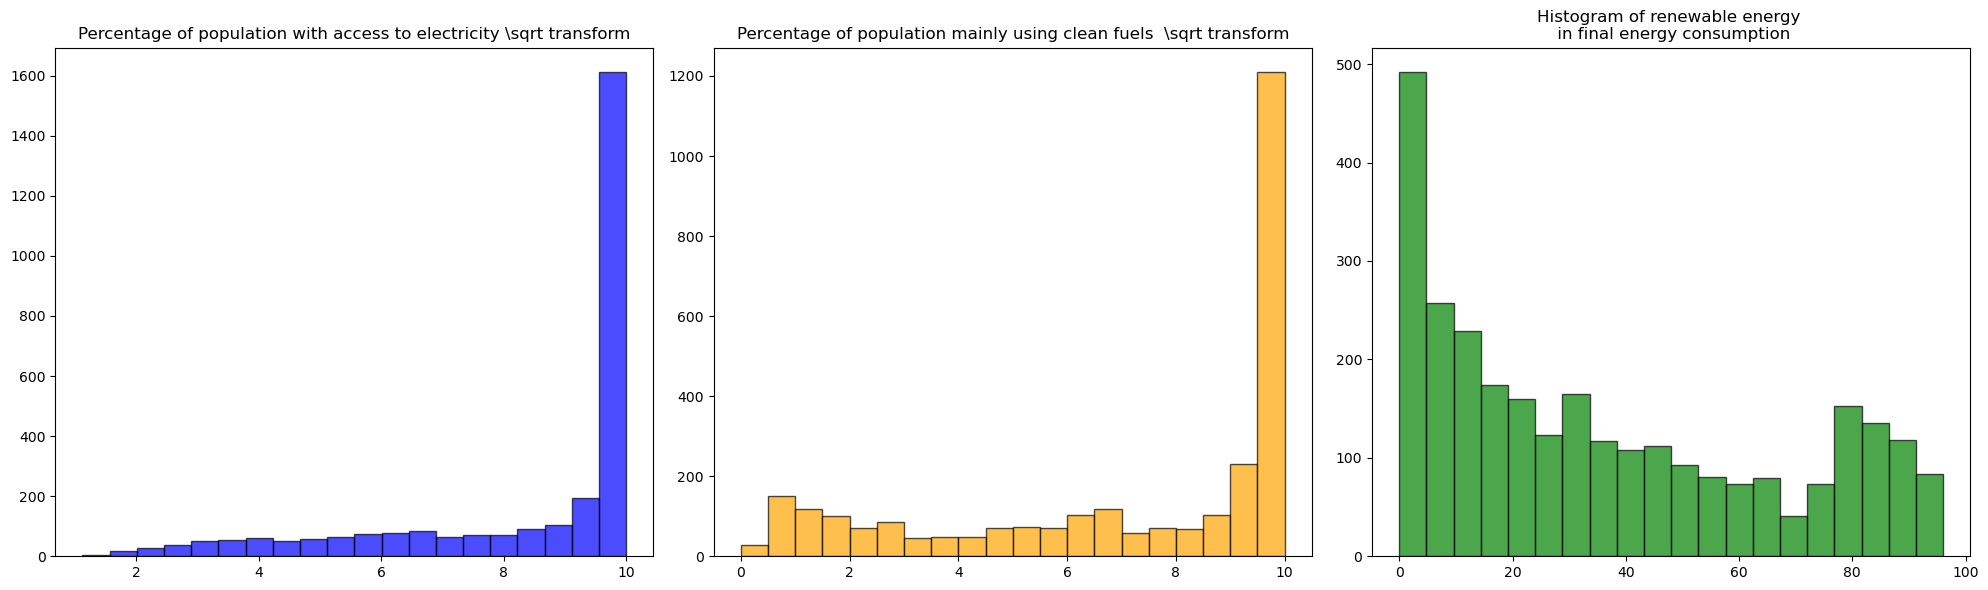

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot the histograms for each column in separate subplots
axs[0].hist(data['Access to electricity (% of population)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Percentage of population with access to electricity \sqrt transform')

axs[1].hist(data["Access to clean fuels for cooking"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Percentage of population mainly using clean fuels  \sqrt transform')

axs[2].hist(data["Renewable energy share in the total final energy consumption (%)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Histogram of renewable energy \n in final energy consumption')

plt.tight_layout()
plt.show()

This shows us that most places, a 100% of the population has access to electricity. This is almost the case for usage of clean fuels, but a larger part of the world has 0% access to clean fuels. When it comes to renewable energy in final energy consumption, most have 0%, but the people who have more than that is more or less evenly distributed between 0 and 95%. On average, the percentage of renewable energy consumption is 35%. 

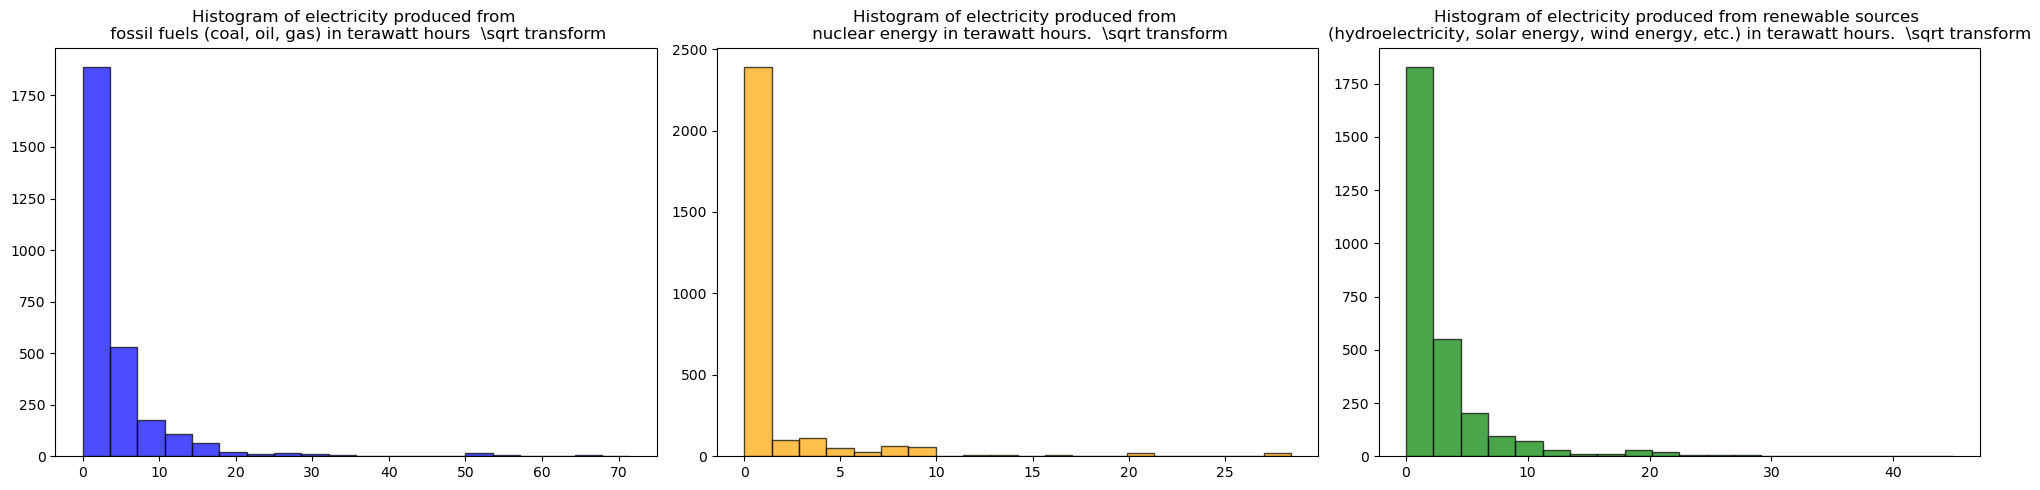

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the histograms for each column in separate subplots
axs[0].hist(data['Electricity from fossil fuels (TWh)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Histogram of electricity produced from \n fossil fuels (coal, oil, gas) in terawatt hours  \sqrt transform')

axs[1].hist(data["Electricity from nuclear (TWh)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of electricity produced from \n nuclear energy in terawatt hours.  \sqrt transform')

axs[2].hist(data["Electricity from renewables (TWh)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Histogram of electricity produced from renewable sources \n(hydroelectricity, solar energy, wind energy, etc.) in terawatt hours.  \sqrt transform')

# Uncomment and add more subplots if needed for other columns

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

With the next three variables, we have transformed the variables using a square root-tranformation. There is high frequancy of the lowest level of energy production, which is logical as not all countries produce a lot of electricity. 

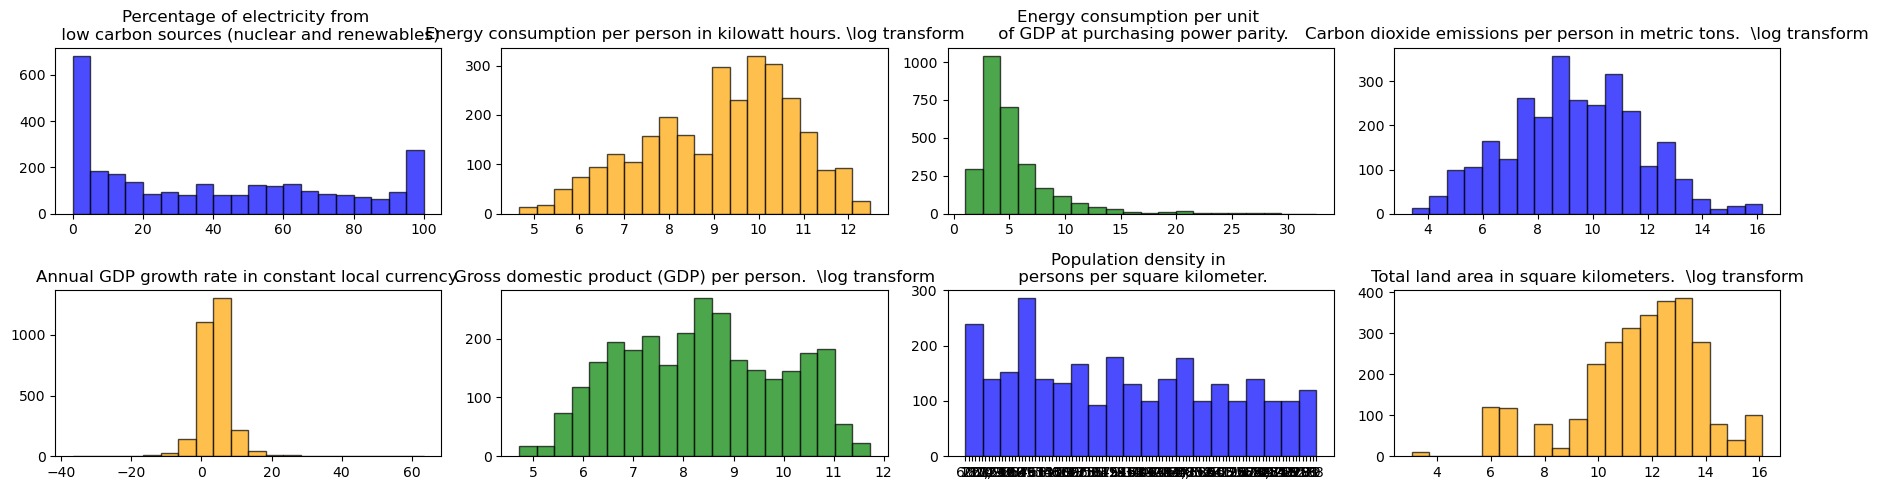

In [32]:
fig, axs = plt.subplots(2, 4, figsize=(18, 5))

# Plotting of the histograms for each column in separate subplots
axs[0][0].hist(data['Low-carbon electricity (% electricity)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][0].set_title('Percentage of electricity from \n low carbon sources (nuclear and renewables)')

axs[0][1].hist(data["Primary energy consumption per capita (kWh/person)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0][1].set_title('Energy consumption per person in kilowatt hours. \log transform')

axs[0][2].hist(data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[0][2].set_title('Energy consumption per unit \n of GDP at purchasing power parity.')

axs[0][3].hist(data["Value_co2_emissions_kt_by_country"], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][3].set_title('Carbon dioxide emissions per person in metric tons.  \log transform')

axs[1][0].hist(data["gdp_growth"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][0].set_title('Annual GDP growth rate in constant local currency.')

axs[1][1].hist(data["gdp_per_capita"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1][1].set_title('Gross domestic product (GDP) per person.  \log transform')

axs[1][2].hist(data['Density\\n(P/Km2)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[1][2].set_title('Population density in \n persons per square kilometer.')

axs[1][3].hist(data["Land Area(Km2)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][3].set_title('Total land area in square kilometers.  \log transform')

plt.tight_layout()
plt.show()

Among the remaining variables, we also chose to log-tranform the $CO_2$ emissions per person, energy consumption per person in Kwh, GDP per person and total land area in km². From the descriptive analysis, we can interperet that: 
- It is common to have 0% electivity coming from low carbon sources, but the amount of places where that percentage is 100% is far from negligible. 
- Most people consume between $e⁹ - e^{11}$ = 8000-60000 kWh of energy per year
- The energy consumption per unit of GDP is centered around 4 Kwh per unit of GPP
- The most common carbon dioxide emission per person is e⁸ = 2980 metric tonnes per year
- The annual GDP growth rate is normally around 0-5%
- GDP per person is centered around e⁸ = 2980
- Most places have a very low population density

### Question 5

In [33]:
co2_pays_annees

{}

In [34]:
co2_pays_annees = {}
country = ""
tot = 0
for i in range(data.shape[0]):
    if data["Entity"][i] == country:
        tot += data["Value_co2_emissions_kt_by_country"][i]
    else:
        co2_pays_annees[country] = tot
        country = data["Entity"][i]
        tot = 0
        
del co2_pays_annees[""]

biggest = []
temp = co2_pays_annees
for i in range(5):
    big = max(temp, key=co2_pays_annees.get)
    biggest.append(big)
    del temp[big]
    
print(biggest)
    
df_co2_pays_annees = pd.DataFrame({'country':co2_pays_annees.keys(), 'co2 emission':co2_pays_annees.values()})


['China', 'United States', 'India', 'Japan', 'Germany']


In [35]:
df_co2_pays_annees.plot.bar(y = "co2 emission", x = "country", figsize=(500, 100), color = ['red', 'blue'])

<Axes: xlabel='country'>

### Question 6

## Analyse descriptive multidimensionnelle

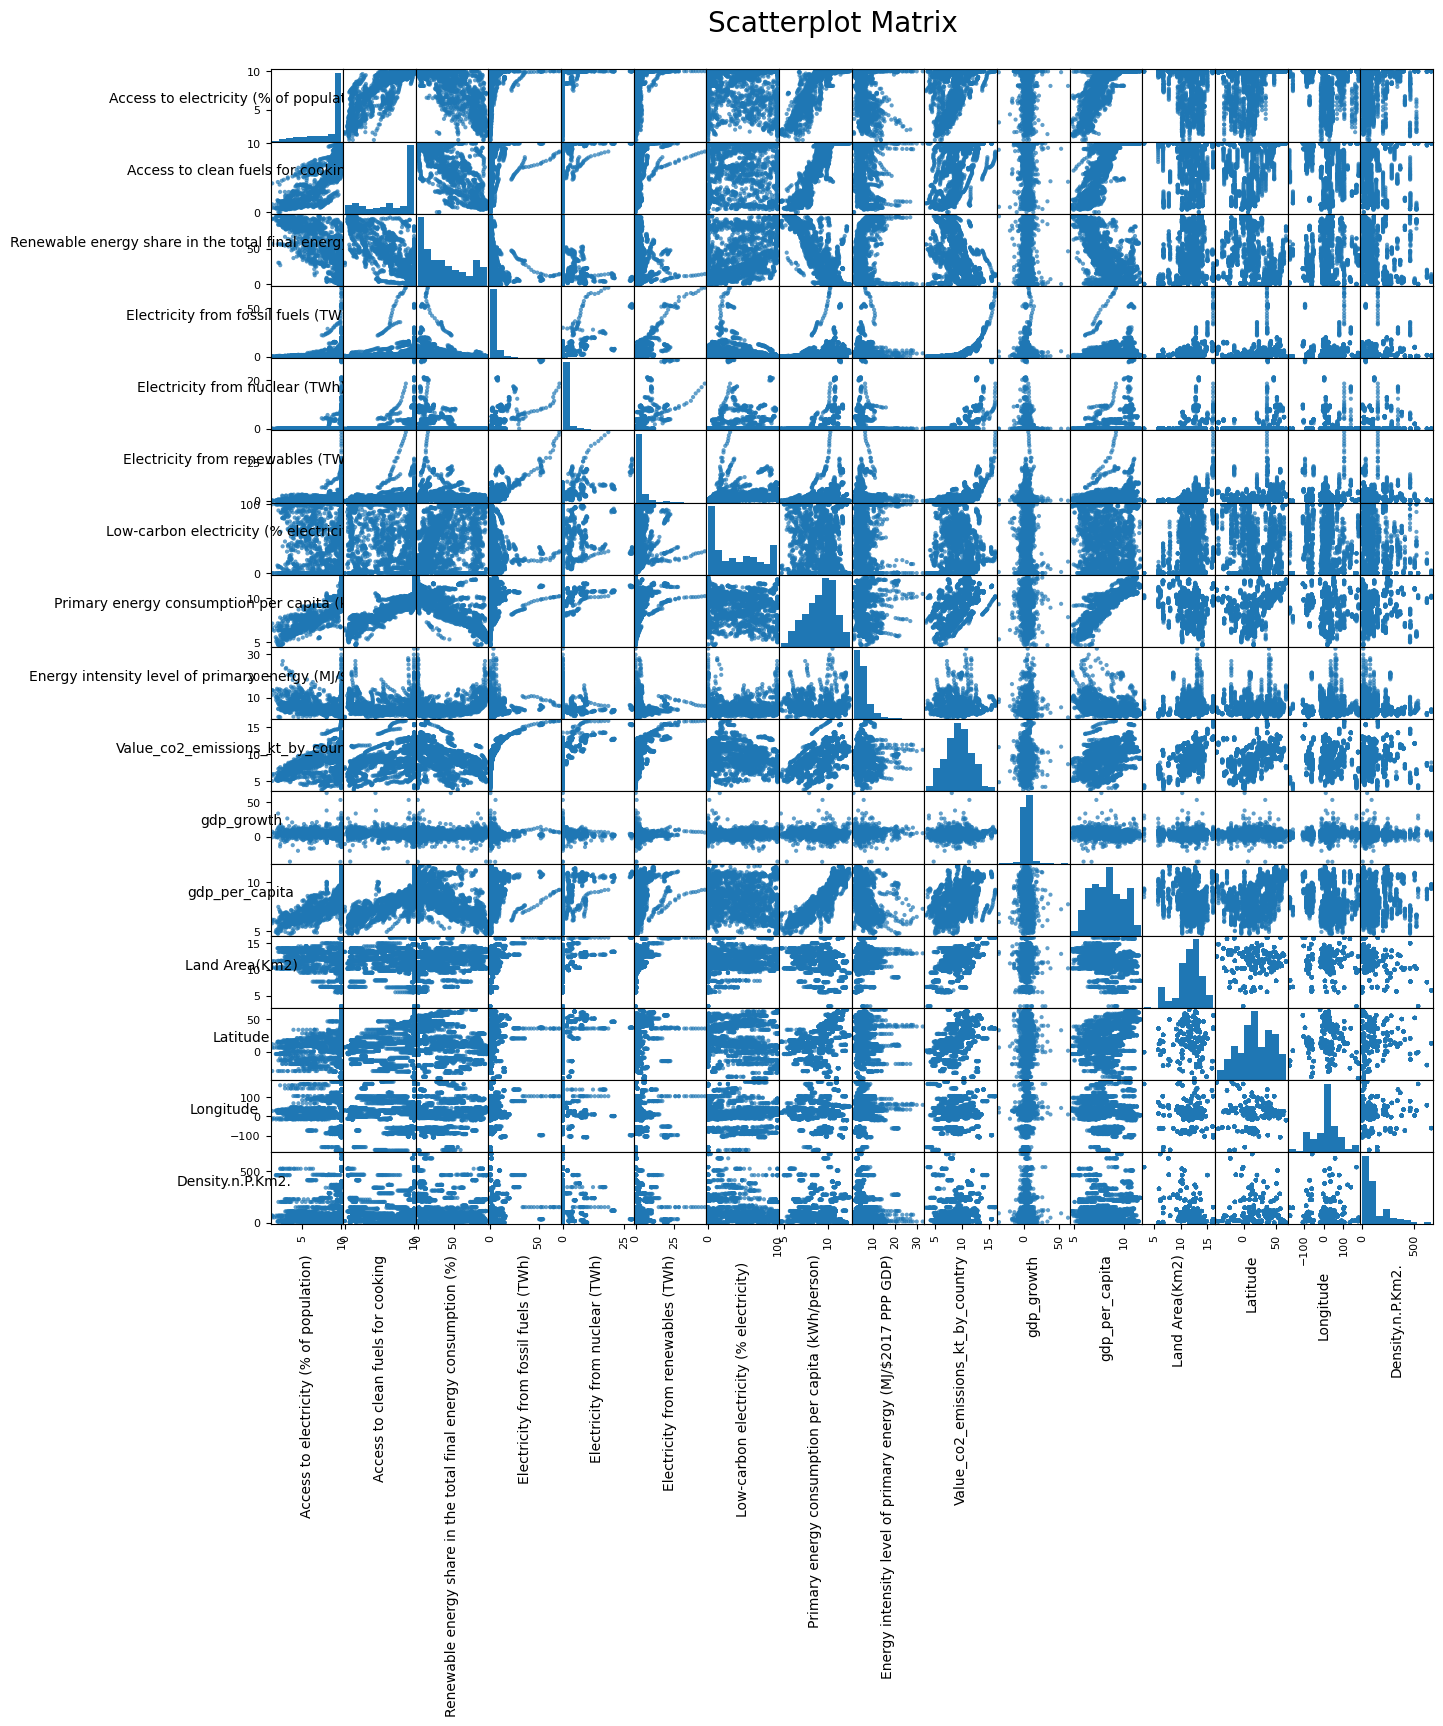

In [36]:
scatter_matrix =pd.plotting.scatter_matrix(data.iloc[:, 2:], figsize=(15, 15), alpha=0.7)
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation('horizontal')
    #ax.yaxis.label.set_va('center')
plt.suptitle("Scatterplot Matrix", y=0.92, fontsize=20)
plt.show()

# enlever land Area, latidtude et longitude ??

/tmp/ipykernel_13851/2937997379.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_data.corr()


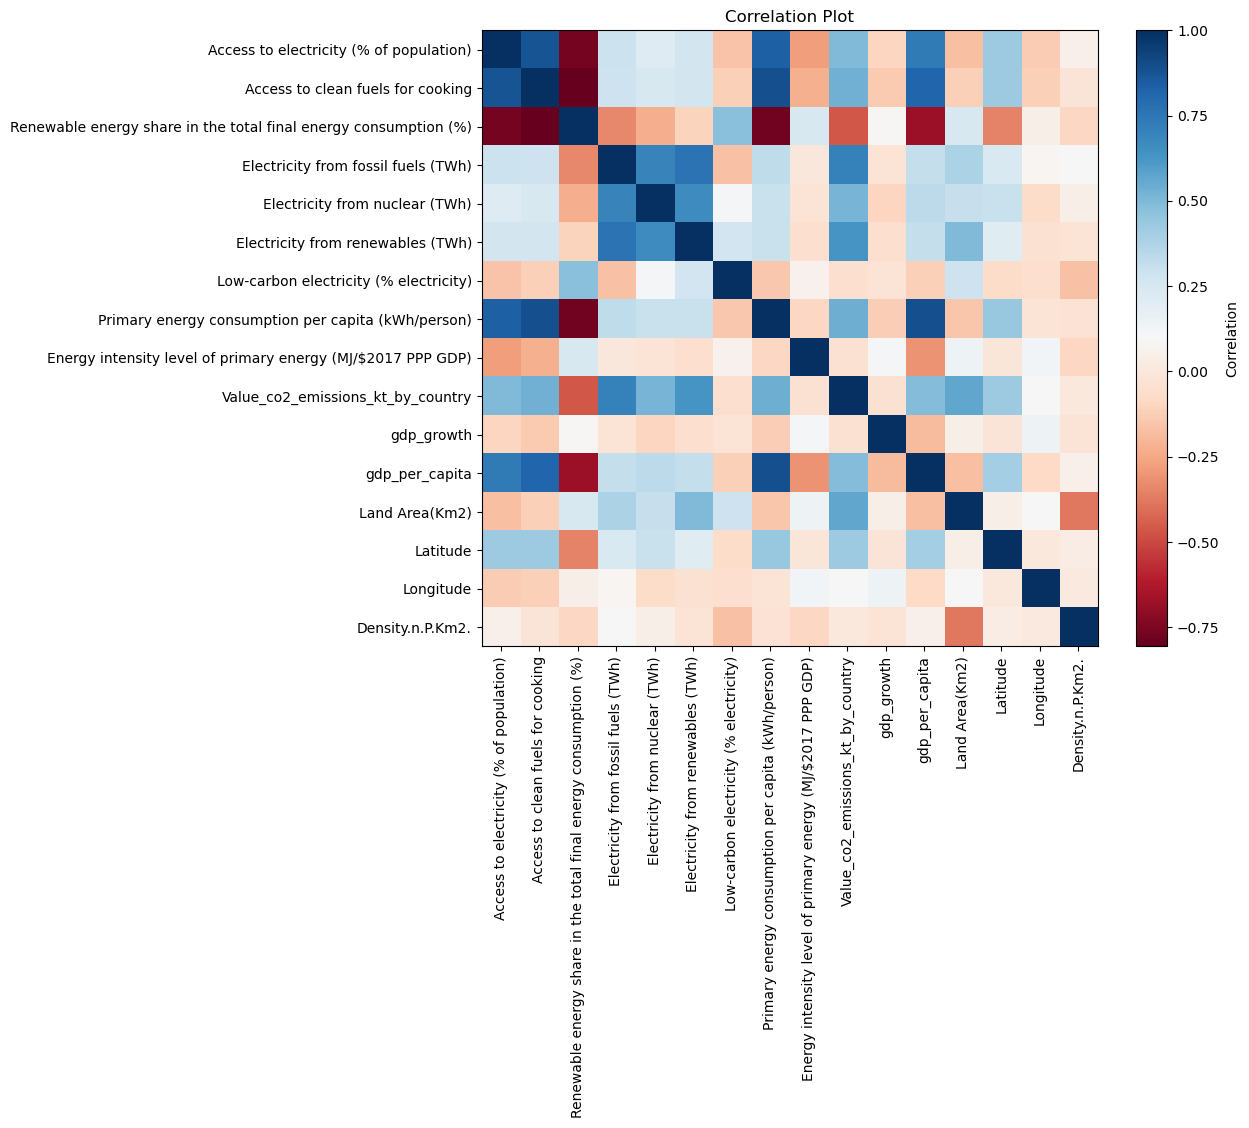

In [37]:
clean_data = data.iloc[:, 2:].dropna()

corr = clean_data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='RdBu', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Plot')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

### Question 7



The following commands perform a Principal Component Analysis (PCA) on quantitative variables.

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Selection of quantitative variables
data_quantitative = data_complete.select_dtypes(include='number')

# réduction des variables
X=scale(data_quantitative)

# ACP on quantitative variables
pca = PCA()
C = pca.fit(X).transform(X)

# Create a DataFrame with the first 10 eigenvalues and their cumulative percentage of variance
eigenvalues_df = pd.DataFrame({
    'Eigenvalues': pca.explained_variance_[:10],
    'Cumulative Variance (%)': pca.explained_variance_ratio_[:10].cumsum() * 100
})

# Display the DataFrame
print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
print(eigenvalues_df)

Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:
   Eigenvalues  Cumulative Variance (%)
0     4.497847                28.101740
1     3.205793                48.130958
2     1.373984                56.715364
3     1.325275                64.995445
4     1.037927                71.480226
5     0.908151                77.154194
6     0.851153                82.472048
7     0.726137                87.008820
8     0.640907                91.013090
9     0.527988                94.311864


We observe a cumulative percentage of variance of 90.917527 corrisponding to 9 eigenvalues. Then, we will keep 9 dimensions as 90.917527% > 85%.

The next plot shows the percentage of explained variance corresponding to each dimension.

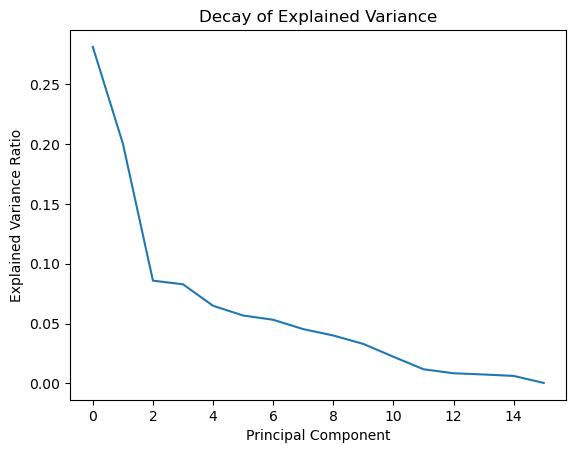

In [39]:
# Decay of Explained Variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Decay of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Show the plot
plt.show()

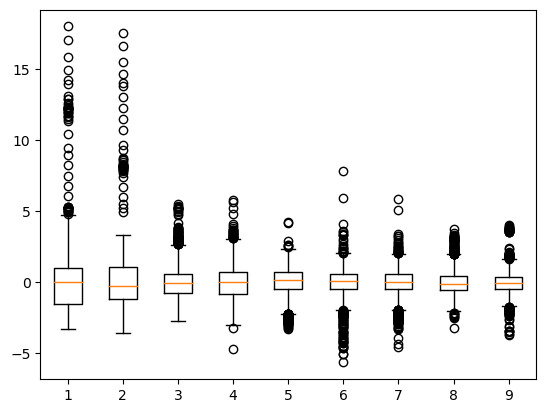

In [40]:
# Boxplots for individual coordinates
plt.boxplot(C[:,0:9])
plt.show()

In [41]:
# Correlation matrix between variables and dimensions 
#
#
#
#
#
#

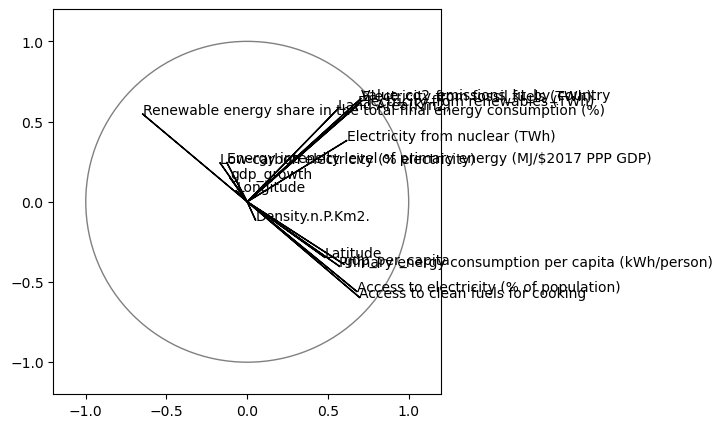

In [42]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

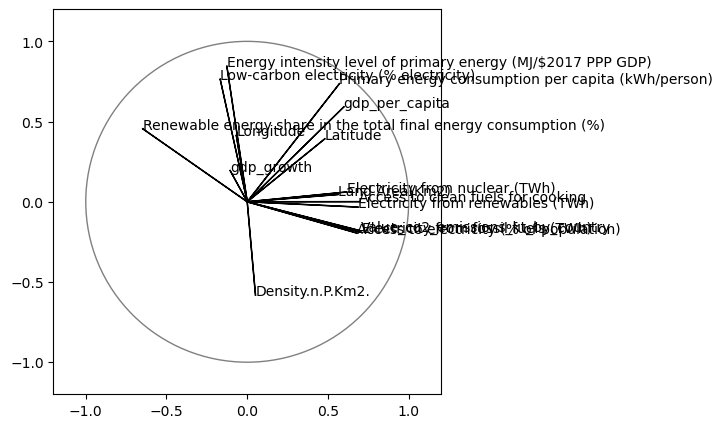

In [43]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 3
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

### Question 8

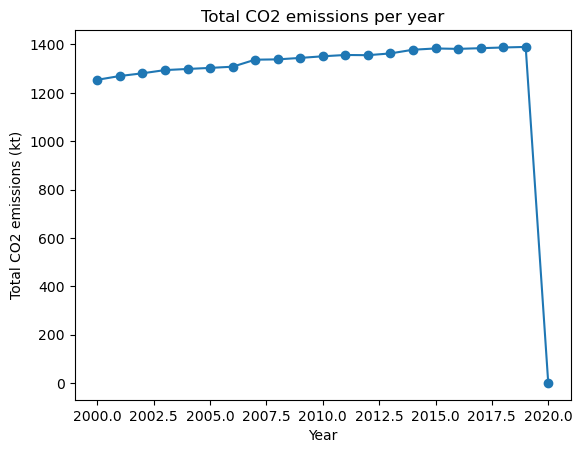

In [44]:
# Grouping the data by year and sum the CO2 emissions
sum_co2_by_year = data.groupby('Year')['Value_co2_emissions_kt_by_country'].sum()

plt.plot(sum_co2_by_year.index, sum_co2_by_year.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Total CO2 emissions (kt)')
plt.title('Total CO2 emissions per year')
plt.show()


In [45]:
data['Year'].corr(data['Value_co2_emissions_kt_by_country'])

0.047144628350175355

In [46]:
from sklearn.linear_model import LinearRegression

X = data[['Year']] 
y = data['Value_co2_emissions_kt_by_country']
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Score:",  model.score(X, y))

Intercept: -29.96291057917871
Score: 0.0022226159822761327
